In [28]:
from sklearn_som.som import SOM
from sklearn import datasets
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os

In [29]:
iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

In [30]:
print(iris_data.shape)
print(iris_label.shape)

(150, 2)
(150,)


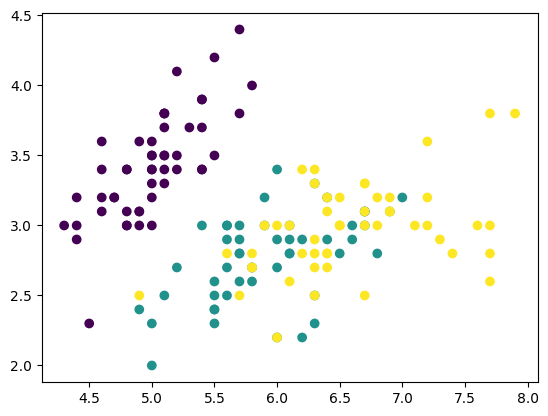

In [31]:
plt.scatter(iris_data[:,0],iris_data[:,1],c=iris_label)

In [32]:
iris_som = SOM(m=3, n=1, dim=2)
iris_som.fit(iris_data)

In [33]:
predictions = iris_som.predict(iris_data)

In [34]:
predictions.shape

(150,)

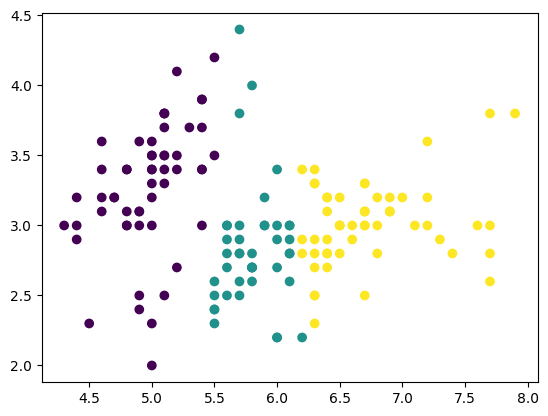

In [35]:
plt.scatter(iris_data[:,0],iris_data[:,1],c=predictions)

# Andiamo a utilizzare questo algoritmo di som sul nostro dataset

In [36]:
nome_file='Friday-02-03-2018_TrafficForML_CICFlowMeter'

with open('pickle/'+nome_file+'/scaled_document.pickle', 'rb') as handle:

    df = pickle.load(handle)

In [37]:
feature_1 = 'Init Bwd Win Byts'
feature_2 = 'Fwd Pkts/s'


df = df[[feature_1, feature_2,'Label']]

In [38]:
df_prova = df.groupby(['Label'])['Label'].count()


df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

        Label
Label        
0      758334
1      286191


In [39]:
bot = df[df.Label == 1]
benign = df[df.Label == 0]

print("Benign: ", len(benign), "Bot: ", len(bot))

Benign:  758334 Bot:  286191


In [40]:
#bilanciamento del dataset
balanced_d = pd.concat([bot, benign.sample(len(bot))])
bal_x = balanced_d.iloc[:,:-1]
bal_y = balanced_d.iloc[:,-1:]
balanced_d.shape

(572382, 3)

In [41]:
print(bal_x.shape)
print(type(bal_x.values))

(572382, 2)
<class 'numpy.ndarray'>


In [42]:
# Eseguiamo il clustering

n_clusters = len(balanced_d['Label'].unique())  # numero di cluster

y_pred = SOM(m=1, n=2, dim=2)

y_pred.fit(bal_x.values)

predictions = y_pred.predict(bal_x.values)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = bal_x[predictions == i]
    cluster_classes = bal_y[predictions == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

In [43]:
print(cluster_samples)
print(cluster_classes)

         Init Bwd Win Byts  Fwd Pkts/s
693075            2.175718   -0.107270
1016449           2.167112   -0.107272
538411            1.741527   -0.107288
406374            0.832308   -0.107289
977993            2.176140   -0.107256
...                    ...         ...
1037611           2.175887   -0.107267
964080            2.175887   -0.107267
320621            2.175887   -0.107275
956813            2.176562   -0.107278
628690            2.175718   -0.107275

[70745 rows x 2 columns]
         Label
693075       0
1016449      0
538411       0
406374       0
977993       0
...        ...
1037611      0
964080       0
320621       0
956813       0
628690       0

[70745 rows x 1 columns]


In [44]:
difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])
print(y['Label'].unique())
print(type(y_pred))
print(np.unique(predictions))
print(n_clusters)

[1 0]
<class 'sklearn_som.som.SOM'>
[0 1]
2


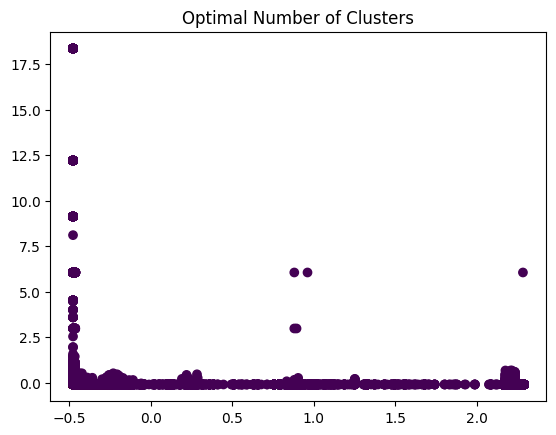

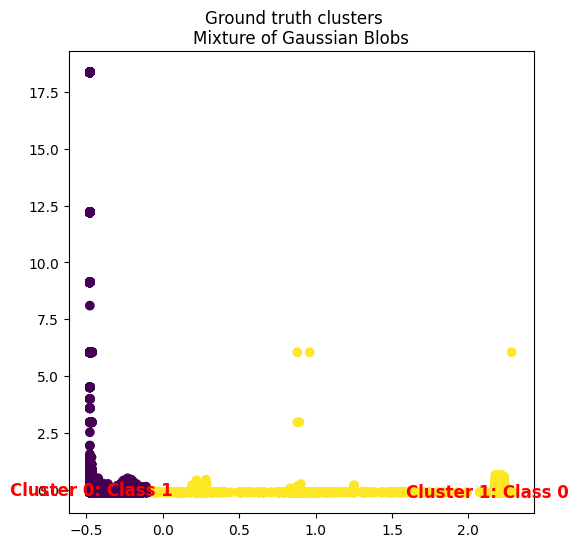

In [45]:
# Plot dei risultati
plt.scatter(x[feature_1], bal_x[feature_2], c=y['Label'])
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(x[feature_1], bal_x[feature_2], c=predictions)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe

for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)
        
    axs.text(
        np.mean(bal_x[feature_1][predictions == i]), np.mean(bal_x[feature_2][predictions == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.title('SOM ', fontsize = 20)
plt.xlabel(feature_1)
plt.ylabel(feature_2)

title = ("SOM " + str(feature_1) + " - " + str(feature_2))
feature_name = title.replace('/','_')
if not os.path.exists('image/'+nome_file+'/clustering/'):
    os.makedirs('image/'+nome_file+'/clustering/')
plt.savefig('image/'+nome_file+'/clustering/'+str(feature_name)+'.png')
plt.show()

In [46]:
indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(predictions))
    if predictions[index] == a
])

In [47]:
for index, row in difference.iterrows():
    print(row['num_cluster'], row['num_class'])

0 1
1 0


In [48]:
for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        predictions[a] = true_value

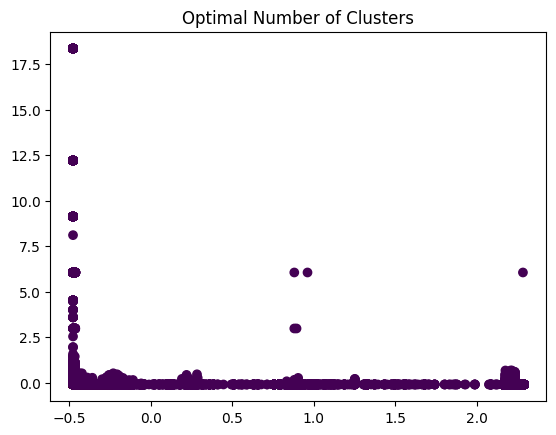

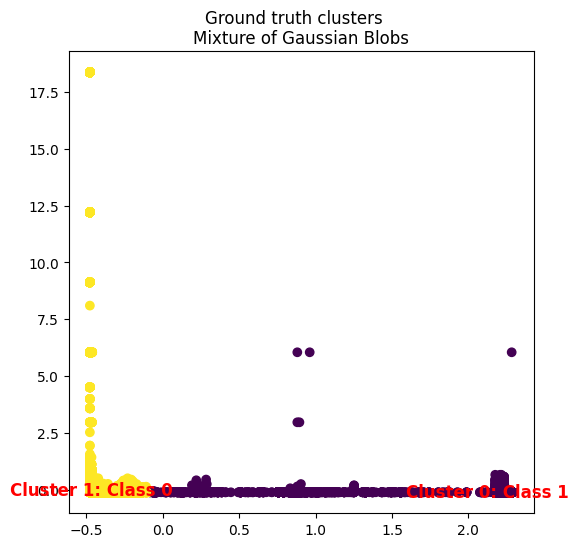

In [49]:
# Plot dei risultati
plt.scatter(bal_x[feature_1], bal_x[feature_2], c=y['Label'])
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(bal_x[feature_1], bal_x[feature_2], c=predictions)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe

for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)
        
    axs.text(
        np.mean(bal_x[feature_1][predictions == i]), np.mean(bal_x[feature_2][predictions == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

In [50]:
accuracy_som = str(accuracy_score(predictions,bal_y))
precision_som = str(precision_score(predictions,bal_y))
recall_som = str(recall_score(predictions,bal_y))

# accuratezza gerarchico
print("accuratezza" + accuracy_som)
# precision gerarchico
print("precision" + precision_som)
# recall gerarchico
print("recall" + recall_som)

metriche = pd.DataFrame({
    'metriche': ["accuracy","precision","recall"],
    'valori': [accuracy_som,precision_som,recall_som]
})

if not os.path.exists('metriche/'+nome_file):
    os.makedirs('metriche/'+nome_file)

metriche.to_csv('metriche/'+nome_file+'/metriche_gerarchico.csv',index=False)

0.623597527525324
